In [46]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from scipy import stats

presurvey1 = "Data/Fall 2019/CSE 8A Fall 2019 DeID/presurvey.csv"
gradebook1 = "Data/Fall 2019/CSE 8A Fall 2019 DeID/gradebook.csv"
presurvey2 = "Data/Fall 2019/CSE 11 Fall 2019 DeID/presurvey.csv"
gradebook2 = "Data/Fall 2019/CSE 11 Fall 2019 DeID/gradebook.csv"
presurvey3 = "Data/Fall 2019/CSE 12 Fall 2019 DeID/presurvey.csv"
gradebook3 = "Data/Fall 2019/CSE 12 Fall 2019 DeID/gradebook.csv"

In [47]:
reflections2 = []
for i in range (1,9):
    reflections2.append(pd.read_csv("Data/Fall 2019/CSE 11 Fall 2019 DeID/R" +str(i)+".csv"))

In [48]:
reflections3 = []
for i in range (1,11):
    reflections3.append(pd.read_csv("Data/Fall 2019/CSE 12 Fall 2019 DeID/R" +str(i)+".csv"))

In [49]:
reflections1 = []
for i in range (1,9):
    reflections1.append(pd.read_csv("Data/Fall 2019/CSE 8A Fall 2019 DeID/R" +str(i)+".csv"))

In [50]:
def scaled_categories(reflections, presurvey, category, label, x, scale1, scale5):
    categoryIssue = 0
    for i in range(x):
        reflections[i][category] = reflections[i][category].replace(to_replace = scale1, value = 1)
        reflections[i][category] = reflections[i][category].replace(to_replace = "2", value = 2)
        reflections[i][category] = reflections[i][category].replace(to_replace = "3", value = 3)
        reflections[i][category] = reflections[i][category].replace(to_replace = "4", value = 4)    
        reflections[i][category] = reflections[i][category].replace(to_replace = scale5, value = 5)
        category_issue = reflections[i][category]
        DeID = reflections[i]["DeID"]
        s = label + str(i) 
        cat = DataFrame({"DeID": DeID, s: category_issue})
        if i == 0:
            categoryIssue = cat
        else:
            categoryIssue = pd.merge(categoryIssue, cat, on="DeID")
            
    df = pd.read_csv(presurvey)
    status = df["Did.you.enter.UCSD.as.a.transfer.student.from.another..2.year.or.4.year..college.or.university."] == "Yes"
    DeID = df["DeID"]
    transferStatus = DataFrame({"DeID": DeID, "Transfer Status": status})

    mergedData = pd.merge(transferStatus, categoryIssue, on="DeID")
    transfer = mergedData[mergedData["Transfer Status"] == True]
    native = mergedData[mergedData["Transfer Status"] == False]
    
    return {'transfer' : transfer, 'native' : native}
    

In [72]:
category = "At.this.time..approximately.how.many.other.students.in.this.course.would.you.be.comfortable.reaching.out.to.study.with."
label = "# of People "
graphTitle = "# of People you Feel Comfortable Reaching Out To"
X_title = "Week"
Y_title = "Number of Students"
x = 8
scale1 = "1"
scale5 = "5"

data = scaled_categories(reflections1, presurvey1, category, label, x, scale1, scale5)
transfer1 = data['transfer']
native1 = data['native'] 
data = scaled_categories(reflections2, presurvey2, category, label, x, scale1, scale5)
transfer2 = data['transfer']
native2 = data['native'] 

x = 10
data = scaled_categories(reflections3, presurvey3, category, label, x, scale1, scale5)
transfer3 = data['transfer']
native3 = data['native'] 

In [85]:
x_label1 = ["Week 2", "Week 3", "Week 4", "Week 5", "Week 6", "Week 7", "Week 8", "Week 9"]
x_label2 = ["Week 1", "Week 2", "Week 3", "Week 4", "Week 5", "Week 6", "Week 7", "Week 8", "Week 9", "Week 10"]

x=8
transfer = transfer1
native = native1

transferIssues = []
nativeIssues = []
difference = []
utestStatistics = []
pValuesU = []

for i in range(x):
    df = pd.DataFrame({label+str(i):transfer[label+str(i)]})
    df = df[df[label+str(i)] >= 0]
    df['z_score']=stats.zscore(df[label+str(i)])
    transferRefined = df[df['z_score'].abs()<2.5]

    df = pd.DataFrame({label+str(i):native[label+str(i)]})
    df = df[df[label+str(i)] >= 0]
    df['z_score']=stats.zscore(df[label+str(i)])
    nativeRefined = df[df['z_score'].abs()<2.5]

    transferIssues.append(transferRefined[label+str(i)].mean())
    nativeIssues.append(nativeRefined[label+str(i)].mean())
    difference.append(transferIssues[i] - nativeIssues[i])
    ttest_results = stats.ttest_ind(transferRefined[label+str(i)], nativeRefined[label+str(i)])
    utest_results = stats.mannwhitneyu(transferRefined[label+str(i)], nativeRefined[label+str(i)])
    utestStatistics.append(utest_results[0])
    pValuesU.append(utest_results[1])

df1 = DataFrame({"Week" : Series(x_label1), 
                "Transfer Mean" : Series(transferIssues), 
                "Native Mean" : Series(nativeIssues), 
                "Difference" : difference,
                "p-value (u-test)" : pValuesU,
                "Test Statistic (u-test)" : utestStatistics})

transfer = transfer2
native = native2

transferIssues = []
nativeIssues = []
difference = []
utestStatistics = []
pValuesU = []

for i in range(x):
    df = pd.DataFrame({label+str(i):transfer[label+str(i)]})
    df = df[df[label+str(i)] >= 0]
    df['z_score']=stats.zscore(df[label+str(i)])
    transferRefined = df[df['z_score'].abs()<2.5]

    df = pd.DataFrame({label+str(i):native[label+str(i)]})
    df = df[df[label+str(i)] >= 0]
    df['z_score']=stats.zscore(df[label+str(i)])
    nativeRefined = df[df['z_score'].abs()<2.5]

    transferIssues.append(transferRefined[label+str(i)].mean())
    nativeIssues.append(nativeRefined[label+str(i)].mean())
    difference.append(transferIssues[i] - nativeIssues[i])
    ttest_results = stats.ttest_ind(transferRefined[label+str(i)], nativeRefined[label+str(i)])
    utest_results = stats.mannwhitneyu(transferRefined[label+str(i)], nativeRefined[label+str(i)])
    utestStatistics.append(utest_results[0])
    pValuesU.append(utest_results[1])

df2 = DataFrame({"Week" : Series(x_label1), 
                "Transfer Mean" : Series(transferIssues), 
                "Native Mean" : Series(nativeIssues), 
                "Difference" : difference,
                "p-value (u-test)" : pValuesU,
                "Test Statistic (u-test)" : utestStatistics})


x=10
transfer = transfer3
native = native3

transferIssues = []
nativeIssues = []
difference = []
utestStatistics = []
pValuesU = []

for i in range(x):
    df = pd.DataFrame({label+str(i):transfer[label+str(i)]})
    df = df[df[label+str(i)] >= 0]
    df['z_score']=stats.zscore(df[label+str(i)])
    transferRefined = df[df['z_score'].abs()<2.5]

    df = pd.DataFrame({label+str(i):native[label+str(i)]})
    df = df[df[label+str(i)] >= 0]
    df['z_score']=stats.zscore(df[label+str(i)])
    nativeRefined = df[df['z_score'].abs()<2.5]

    transferIssues.append(transferRefined[label+str(i)].mean())
    nativeIssues.append(nativeRefined[label+str(i)].mean())
    difference.append(transferIssues[i] - nativeIssues[i])
    ttest_results = stats.ttest_ind(transferRefined[label+str(i)], nativeRefined[label+str(i)])
    utest_results = stats.mannwhitneyu(transferRefined[label+str(i)], nativeRefined[label+str(i)])
    utestStatistics.append(utest_results[0])
    pValuesU.append(utest_results[1])

df3 = DataFrame({"Week" : Series(x_label2), 
                "Transfer Mean" : Series(transferIssues), 
                "Native Mean" : Series(nativeIssues), 
                "Difference" : difference,
                "p-value (u-test)" : pValuesU,
                "Test Statistic (u-test)" : utestStatistics})


In [169]:
display("CS 1:")
display(df1)
display("CS 1A:")
display(df2)
display("CS 2:")
display(df3)

'CS 1:'

,Week,Transfer Mean,Native Mean,Difference,p-value (u-test),Test Statistic (u-test)
0,Week 2,2.000000,3.423077,-1.423077,0.020260,1072.5
1,Week 3,2.357143,4.009569,-1.652427,0.011973,941.0
2,Week 4,3.357143,4.168269,-0.811126,0.076674,1126.5
3,Week 5,1.500000,5.038278,-3.538278,0.000026,524.5
4,Week 6,1.714286,4.543269,-2.828984,0.000109,603.5
5,Week 7,2.642857,4.777778,-2.134921,0.005355,863.0
6,Week 8,2.000000,4.779904,-2.779904,0.000453,693.5
7,Week 9,2.571429,5.019139,-2.447710,0.001674,782.0


'CS 1A:'

,Week,Transfer Mean,Native Mean,Difference,p-value (u-test),Test Statistic (u-test)
0,Week 2,1.812500,5.664975,-3.852475,0.000172,734.5
1,Week 3,2.125000,5.863636,-3.738636,0.000300,774.0
2,Week 4,2.062500,6.291457,-4.228957,0.000145,731.0
3,Week 5,2.187500,6.335025,-4.147525,0.000075,683.5
4,Week 6,2.200000,5.887179,-3.687179,0.000123,636.0
5,Week 7,2.333333,6.204082,-3.870748,0.000150,651.5
6,Week 8,2.533333,6.385787,-3.852453,0.000309,697.5
7,Week 9,3.375000,6.301020,-2.926020,0.003460,934.0


'CS 2:'

,Week,Transfer Mean,Native Mean,Difference,p-value (u-test),Test Statistic (u-test)
0,Week 1,2.454545,2.031250,0.423295,0.250862,152.0
1,Week 2,2.727273,1.967742,0.759531,0.081896,122.5
2,Week 3,3.363636,2.000000,1.363636,0.019905,97.5
3,Week 4,4.727273,2.166667,2.560606,0.034965,104.0
4,Week 5,5.000000,1.966667,3.033333,0.007066,82.5
5,Week 6,6.000000,2.466667,3.533333,0.027272,100.0
6,Week 7,6.454545,2.366667,4.087879,0.011572,88.5
7,Week 8,5.909091,3.242424,2.666667,0.143599,142.5
8,Week 9,4.272727,3.242424,1.030303,0.096857,133.5
9,Week 10,5.000000,2.937500,2.062500,0.034488,111.0


Text(0, 0.5, 'Number of Students')

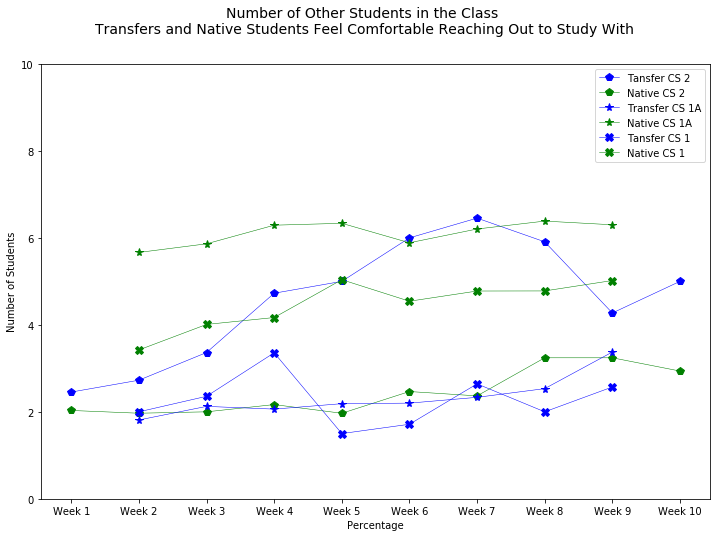

In [179]:
X_label = ""
Y_label = "# of Students"
graphTitle = "Number of Other Students in the Class \nTransfers and Native Students Feel Comfortable Reaching Out to Study With"

plt.figure(figsize=(12,8))
plt.plot(x_label2, df3["Transfer Mean"], "-p", color='blue' , linewidth=0.5, markersize=8)
plt.plot(x_label2, df3["Native Mean"], "-p", color='green', linewidth=0.5, markersize=8)
plt.plot(x_label1, df2["Transfer Mean"], "-*", color='blue', linewidth=0.5, markersize=8)
plt.plot(x_label1, df2["Native Mean"], "-*", color='green', linewidth=0.5, markersize=8)
plt.plot(x_label1, df1["Transfer Mean"], "-X", color='blue', linewidth=0.5, markersize=8)
plt.plot(x_label1, df1["Native Mean"], "-X", color='green', linewidth=0.5, markersize=8)
plt.legend(['Tansfer CS 2', 'Native CS 2', 'Transfer CS 1A','Native CS 1A', 'Tansfer CS 1', 'Native CS 1'])
plt.ylim(0, 10)
plt.suptitle(graphTitle, fontsize=14)
plt.xlabel(X_title, fontsize=10)
plt.ylabel(Y_title, fontsize=10)

In [197]:
fig = go.Figure()
graphTitle = "<b>Number of Other Students in the Class <br>Transfers and Native Students Feel Comfortable Reaching Out to Study With</b>"

fig.add_trace(go.Scatter(x=x_label2, y=df3["Transfer Mean"],
                    mode='lines+markers',
                    name='Transfer CS 2',
                    marker_symbol="circle-dot",
                    marker=dict(
                        color='#955ed2',
                        size=5,
                        line=dict(
                                color='#e44bb1',
                                width=5
                            )
                        )
             ))
fig.add_trace(go.Scatter(x=x_label2, y=df3["Native Mean"],
                    mode='lines+markers',
                    name='Native CS 2',
                    marker_symbol="circle-dot",
                    marker=dict(
                        color='#ffa600',
                        size=5,
                        line=dict(
                                color='#ff6361',
                                width=5
                            )
                        )
               ))

fig.add_trace(go.Scatter(x=x_label1, y=df2["Transfer Mean"],
                    mode='lines+markers',
                    name='Transfer CS 1A',
                    marker_symbol="square",
                    marker=dict(
                        color='#955ed2',
                        size=5,
                        line=dict(
                                color='#e44bb1',
                                width=5
                            )
                        )
               ))
fig.add_trace(go.Scatter(x=x_label1, y=df2["Native Mean"],
                    mode='lines+markers',
                    name='Native CS 1A',
                    marker_symbol="square",
                    marker=dict(
                        color='#ffa600',
                        size=5,
                        line=dict(
                                color='#ff6361',
                                width=5
                            )
                        )
               ))

fig.add_trace(go.Scatter(x=x_label1, y=df1["Transfer Mean"],
                    mode='lines+markers',
                    name='Transfer CS 1',
                    marker_symbol="triangle-up",
                    marker=dict(
                        color='#955ed2',
                        size=5,
                        line=dict(
                                color='#e44bb1',
                                width=5
                            )
                        )
               ))
fig.add_trace(go.Scatter(x=x_label1, y=df1["Native Mean"],
                    mode='lines+markers',
                    name='Native CS 1',
                    marker_symbol="triangle-up",
                    marker=dict(
                        color='#ffa600',
                        size=5,
                        line=dict(
                                color='#ff6361',
                                width=5
                            )
                        )
               ))
fig.update_layout(title=graphTitle,
                  title_x=0.5,
                  xaxis_title="<b>Week</b>",
                  yaxis_title="<b>Number of Students</b>",
                  legend_title="<b>Legend</b>",
                 )


fig.show()

In [ ]:
mode='lines+markers+text',
text=df3["Transfer Mean"].round(2),
textposition="bottom center",